# Отчёт по лабораторной работе №3
## по дисциплине Машинное обучение
## Вариант 12
### Выполнил: Фомин Е. Н.     19-ИВТ-3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn as sk
import warnings
from pylab import rcParams      # Для изменения размеров гистрограммы
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

encoder = LabelEncoder()

%matplotlib inline
warnings.filterwarnings("ignore")

## Bank Marketing Data Set

Эти данные связаны с прямыми маркетинговыми кампаниями португальского банковского учреждения. Маркетинговые кампании
были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы получить доступ к тому, будет ли
продукт (банковский срочный депозит) подписан ("да" или "нет").

Существует четыре набора данных:
1. bank-additional-full.csv со всеми примерами (41188) и 20 входными данными, упорядоченными по датам;
2. bank-additional.csv с 10% примеров (4119), случайно выбранных из 1 файла), и 20 входов;
3. bank-full.csv со всеми примерами и 17 входами, упорядоченными по дате (более старая версия этого набора данных с меньшим количеством входов);
4. bank.csv с 10% примеров и 17 входами, случайно выбранными из 3 файла (более старая версия этого набора данных с меньшим количеством входов).

Входные переменные:
1. возраст (числовой)
2. работа : тип работы (категориальный: "администратор","синий воротничок","предприниматель","горничная","менеджмент","пенсионер","самозанятый","услуги","студент","техник","безработный","неизвестный")
3. семейное положение : семейное положение (категориальное: "разведен","женат","холост"," неизвестен"; примечание: "разведен" означает разведен или овдовел)
4. образование (категориальное: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. дефолт: есть ли кредит в дефолте? (категорично: "нет","да","неизвестно")
6. жилье: есть ли жилищный кредит? (категорично: "нет","да","неизвестно")
7. кредит: есть ли личный кредит? (категорично: "нет","да","неизвестно")
ПРИМЕЧАНИЕ: Следующее связано с последним контактом текущей кампании:
8. контакт: тип контактной связи (категориальный: "сотовый телефон","стационарный телефон")
9. месяц: последний контактный месяц года (категорический: "январь", "февраль", "март", ..., "ноябрь" , "декабрь")
10. day_of_week: последний контактный день недели (категорический: "пн","вт","ср","чт", "пт")
11. длительность: длительность последнего контакта в секундах (числовая). Важное примечание: этот атрибут сильно влияет на выходную цель
(например, если длительность = 0, то y = "нет"). 
Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти исходные данные должны включаться только для контрольных целей и должны быть отброшены, если
намерение состоит в том, чтобы иметь реалистичную прогностическую модель.
ПРИМЕЧАНИЕ: остальные атрибуты
12. кампания: номер контактов, выполненных во время этой кампании и для данного клиента (числовой, включает последний контакт)
13. pdays: количество дней, прошедших после последнего контакта с клиентом из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались)
14. предыдущий: количество контактов, выполненных до этой кампании и для данного клиента (числовое)
15. poutcome: результат предыдущей маркетинговой кампании (категорически: "неудача","несуществующий ","успех")
ПРИМЕЧАНИЕ: атрибуты социального и экономического контекста
16. emp.var.rate: коэффициент вариации занятости - квартальный показатель (числовой)
17. cons.price.idx: индекс потребительских цен - месячный индикатор (числовой)
18. cons.conf.idx: индекс потребительского доверия - ежемесячный индикатор (числовой)
19. euribor3m: euribor 3 month rate - дневной индикатор (числовой)
20. число занятых: число занятых - квартальный показатель (n))
Выходная переменная (желаемая цель):
21. y - сам ответ на вопрос: оформил ли клиент срочный депозит? (бинарный: "да","нет")

In [2]:
df_bank = pd.read_csv ("D:/Питончик/WPy64-3870/notebooks/Lab3/bank-additional-full.csv", sep=';')

In [3]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [5]:
print("Количество записей до удаления дубликатов:", df_bank.shape[0])

Количество записей до удаления дубликатов: 41188


In [6]:
df_bank.drop_duplicates(keep ='first', inplace =True)  

In [7]:
print("Количество записей после удаления дубликатов:", df_bank.shape[0])

Количество записей после удаления дубликатов: 41176


#### Оцените сбалансированность данных по классам (постройте гистограмму).

In [8]:
categorical = []
for i in df_bank.columns:
    if (df_bank[i].dtype != np.float64 and df_bank[i].dtype != np.int64):
        categorical.append(df_bank[i].name)
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

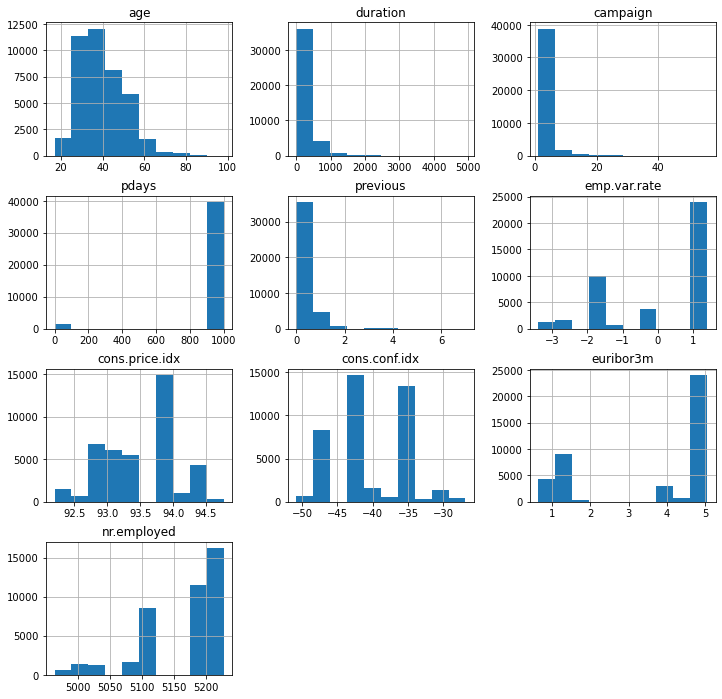

In [9]:
rcParams['figure.figsize'] = 12, 12
df_bank.hist()

<AxesSubplot:xlabel='count', ylabel='y'>

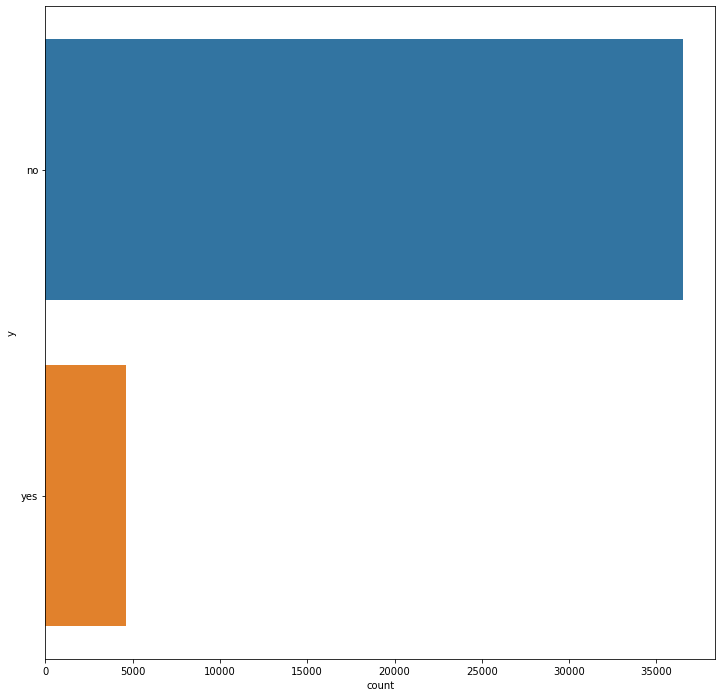

In [10]:
sn.countplot(data=df_bank, y='y')

Классы несбалансированны, поэтому для оценки качества классификации будем использовать PR-кривую, поскольку в случае несбалансированности классов она показывает лучшие результаты, чем ROC-кривая.

#### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [11]:
numerical = []
for i in df_bank.columns:
    if (df_bank[i].dtype == np.float64 or df_bank[i].dtype == np.int64):
        numerical.append(df_bank[i].name)
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

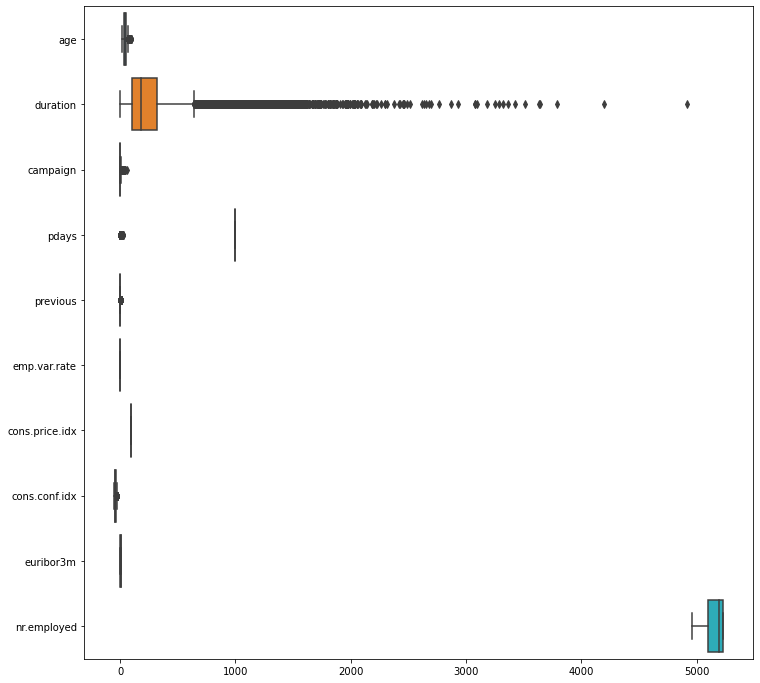

In [12]:
sn.boxplot(data = df_bank[numerical], orient = 'h')
plt.show()

<AxesSubplot:>

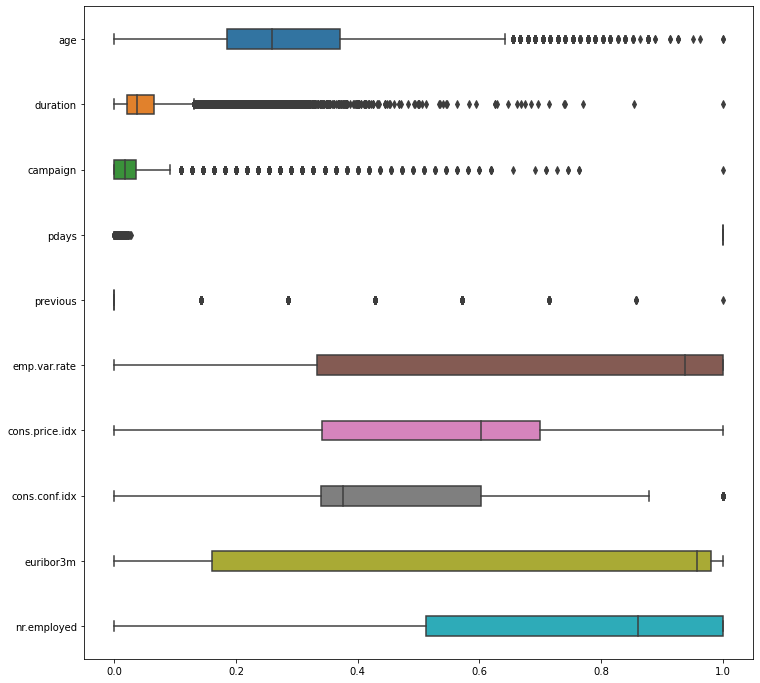

In [13]:
# Нормализация
scaler = MinMaxScaler()
df_bank[numerical] = scaler.fit_transform(df_bank[numerical].values.astype(float))
sn.boxplot(data = df_bank[numerical], width=0.3, orient = 'h')

#### Выполните замену категориальных признаков

In [14]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.000000,1.0,0.000000,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.000000,1.0,0.000000,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,0.000000,1.0,0.000000,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.000000,1.0,0.000000,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,0.000000,1.0,0.000000,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0.000000,1.0,0.000000,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,yes
41184,0.358025,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0.000000,1.0,0.000000,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,no
41185,0.481481,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0.018182,1.0,0.000000,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,no
41186,0.333333,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0.000000,1.0,0.000000,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,yes


In [15]:
encoder = LabelEncoder()
# Способ через цикл:
for i in range (len(categorical)):
    df_bank[categorical[i]] = encoder.fit_transform(df_bank[categorical[i]])
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,3,1,0,0,0,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7,1,3,1,0,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7,1,3,0,2,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0,1,1,0,0,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7,1,3,0,0,2,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,5,1,5,0,2,0,0,7,0,...,0.000000,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,1
41184,0.358025,1,1,5,0,0,0,0,7,0,...,0.000000,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,0
41185,0.481481,5,1,6,0,2,0,0,7,0,...,0.018182,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,0
41186,0.333333,9,1,5,0,0,0,0,7,0,...,0.000000,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,1


#### Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

age               0.030381
job               0.025248
marital           0.046249
education         0.057776
default          -0.099364
housing           0.011613
loan             -0.004922
contact          -0.144774
month            -0.006051
day_of_week       0.015970
duration          0.405297
campaign         -0.066361
pdays            -0.324948
previous          0.230202
poutcome          0.129810
emp.var.rate     -0.298289
cons.price.idx   -0.136134
cons.conf.idx     0.054802
euribor3m        -0.307740
nr.employed      -0.354669
y                 1.000000
Name: y, dtype: float64


['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'poutcome',
 'cons.price.idx',
 'cons.conf.idx']

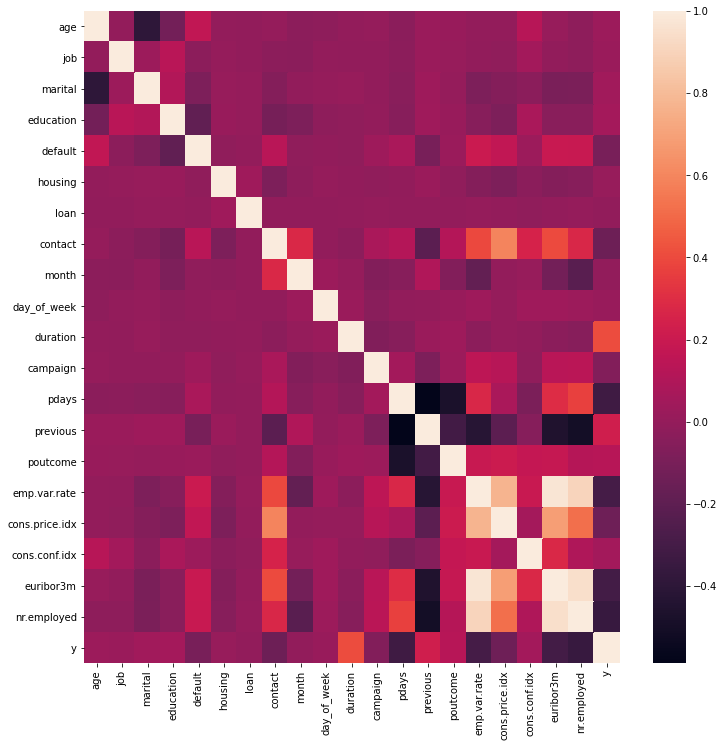

In [16]:
df_bank_lin = df_bank.copy()
corr_matrix = df_bank_lin.corr()
sn.heatmap(corr_matrix);
print(corr_matrix['y'])

to_drop = []
for i in corr_matrix.columns:
    if (abs(corr_matrix['y'][i]) < 0.25):
        to_drop.append(corr_matrix[i].name)
to_drop

In [17]:
df_bank_lin.drop(to_drop , axis = 1, inplace = True)
df_bank_lin

,duration,pdays,emp.var.rate,euribor3m,nr.employed,y
0,0.053070,1.0,0.937500,0.957379,0.859735,0
1,0.030297,1.0,0.937500,0.957379,0.859735,0
2,0.045954,1.0,0.937500,0.957379,0.859735,0
3,0.030704,1.0,0.937500,0.957379,0.859735,0
4,0.062424,1.0,0.937500,0.957379,0.859735,0
...,...,...,...,...,...,...
41183,0.067914,1.0,0.479167,0.089322,0.000000,1
41184,0.077877,1.0,0.479167,0.089322,0.000000,0
41185,0.038430,1.0,0.479167,0.089322,0.000000,0
41186,0.089874,1.0,0.479167,0.089322,0.000000,1


#### Заполните пропущенные значения в данных

In [18]:
df_bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Пропущенные значения отсутствуют.

#### Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

###### Линейный классификатор

In [19]:
X, y = df_bank_lin.drop('y', axis=1), df_bank_lin['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [20]:
slf = Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(max_iter=[x for x in range(1,50)]), n_jobs=-1)
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('Best score:',best_score)
perceptron = sk.linear_model.Perceptron(alpha=selected_alpha, max_iter=selected_max_iter)
perceptron.fit(X_train, y_train)
test_score  = np.mean(y_test == perceptron.predict(X_test))
print('Test score: ', test_score)

Best score: 0.9078106237620036
Test score:  0.8917816203613755


###### Классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [23]:
X, y = df_bank.drop('y', axis=1), df_bank['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [24]:
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 50))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('Best train score: ', best_score,
      '\tneighbors number: ', best_num)
rnc = KNeighborsClassifier(n_neighbors=best_num)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('Test score: ', best_score)

Best train score:  0.8912957243936848 	neighbors number:  12
Test score:  0.8890130172916262


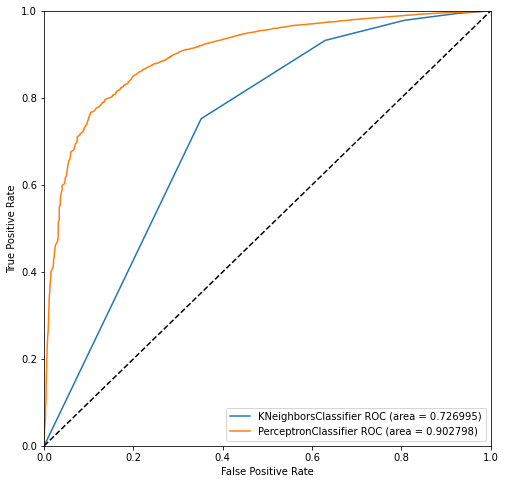

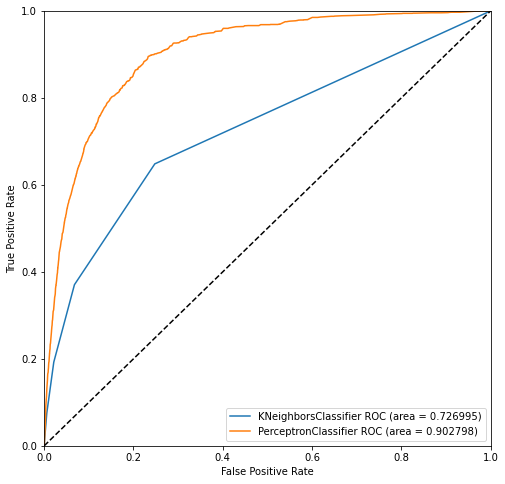

In [26]:
plt.figure(figsize=(8,8))
tpr, fpr, thresholds = roc_curve(y_test, probas_knn0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 
tpr, fpr, thresholds = roc_curve(y_test, probas_slf0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

plt.figure(figsize=(8,8))
fpr, tpr, thresholds = roc_curve(y_test, probas_knn1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 
fpr, tpr, thresholds = roc_curve(y_test, probas_slf1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

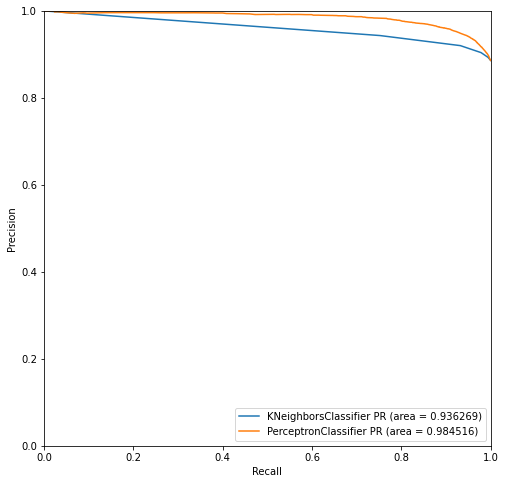

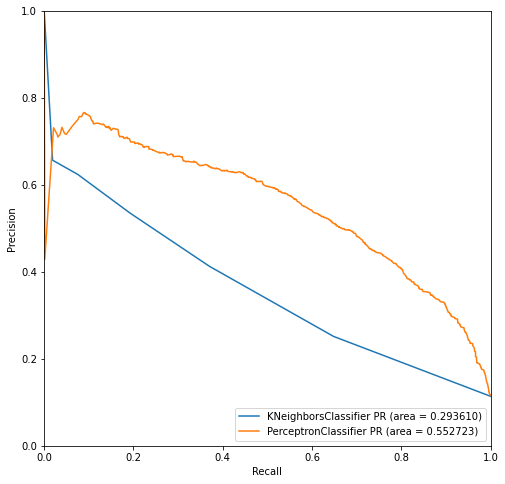

In [27]:
plt.figure(figsize=(8,8))
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn1[:,0])
aps_knn1 = average_precision_score(y_test_invers,probas_knn1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_slf1[:,0])
aps_slf1 = average_precision_score(y_test_invers,probas_slf1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

plt.figure(figsize=(8,8))
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn0[:,1])
aps_knn0 = average_precision_score(y_test,probas_knn0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 
precision, recall, thresholds = precision_recall_curve(y_test, probas_slf1[:,1])
aps_slf1 = average_precision_score(y_test,probas_slf1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

Классификаторы персептрон и k ближайших соседей имеют разные показатели качества относительно ROC и PR кривых: персептрон качественнее.
